In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import warnings 
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [2]:
df=pd.read_csv('Heart Disease.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Exploratory Data Analysis

In [4]:
# Heart Disease Distribution

Text(0.5, 1.0, 'Heart Disease')

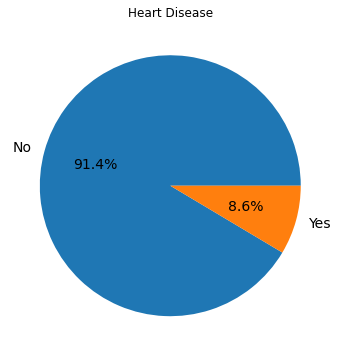

In [5]:
disease = df.groupby('HeartDisease').size()
plt.figure(figsize=(10,6))
plt.pie(disease,labels=['No', 'Yes'],autopct='%1.1f%%', textprops={"fontsize": 14})
plt.title('Heart Disease')

In [6]:
# Gender Distribution

<AxesSubplot:xlabel='Sex', ylabel='count'>

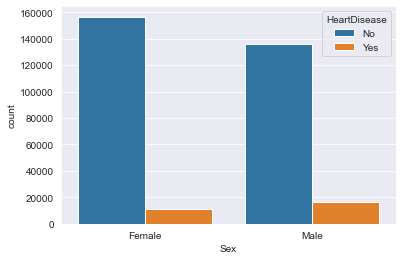

In [7]:
sns.set_style('darkgrid')
sns.countplot(data=df, x = 'Sex',hue='HeartDisease')

In [8]:
# Majority are Females
# Males have more Heart Disease than females

# Heart Disease among different Race

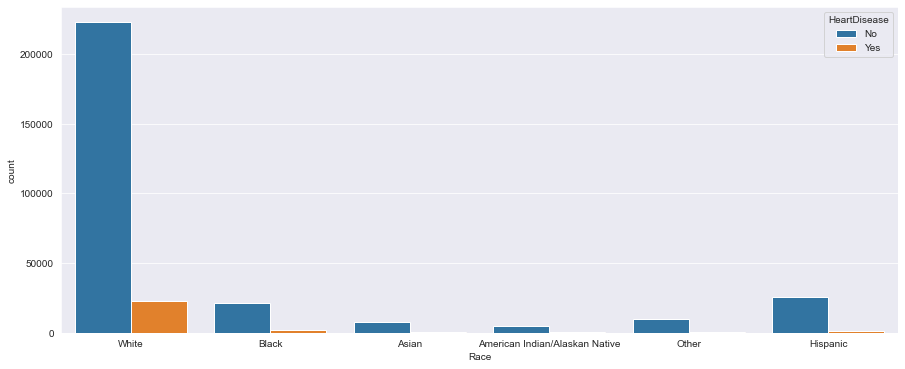

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
sns.countplot(data=df, x = 'Race',hue='HeartDisease')
plt.show()

In [10]:
# Majority peoples are White
# Also, most heart disease patients are white people

# Age Category wise heart disease

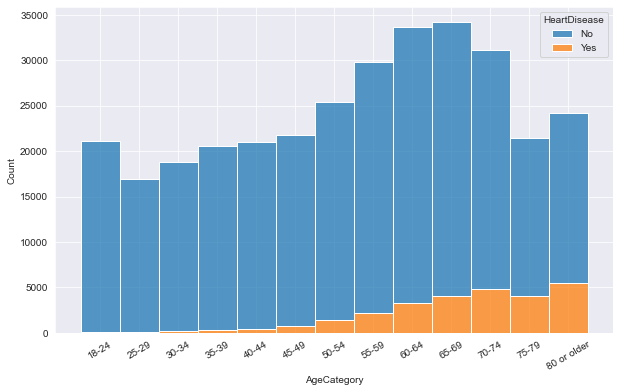

In [11]:
adata = df.sort_values(by=['AgeCategory'],ascending = True)
plt.figure(figsize=(10,6))
sns.histplot(data=adata, x="AgeCategory", hue="HeartDisease", multiple="stack")
plt.xticks(rotation=30)
plt.show()

In [12]:
# People who have heart disease, are mostly old people

# describe general health condition

<AxesSubplot:xlabel='GenHealth', ylabel='count'>

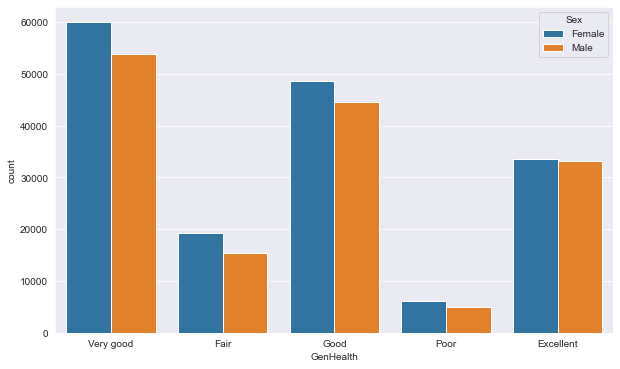

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'GenHealth',hue='Sex')

In [14]:
# Most people describe general health as Very good, and the ratio of females is higher than males.

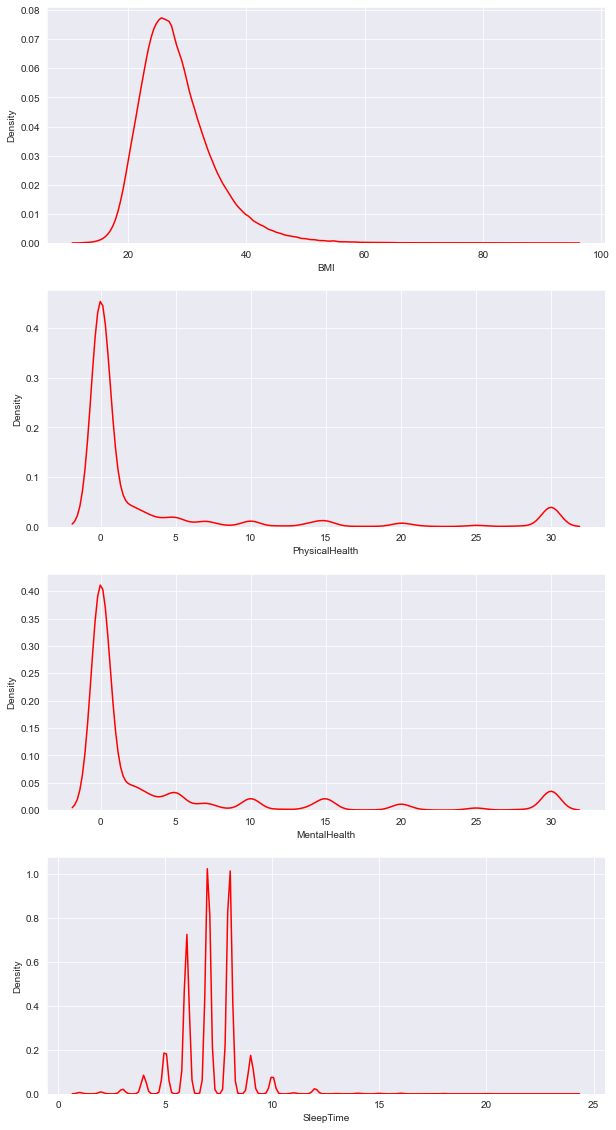

In [15]:
lst = ['BMI','PhysicalHealth', 'MentalHealth','SleepTime']
fig, axs = plt.subplots(4,1,figsize=(10,20))
for i, e in enumerate(lst):
    sns.kdeplot(data=df,x=e,ax=axs[i], color='red')
    
sns.set_style('darkgrid')
plt.show()

# Data Preprocessing

In [16]:
# Missing Value Handling

<AxesSubplot:>

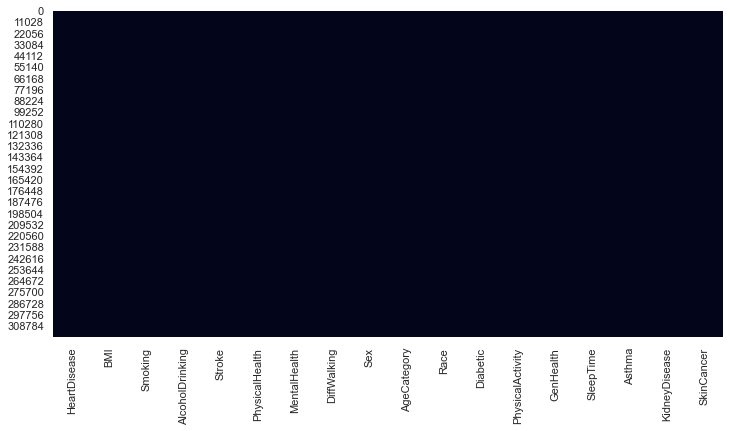

In [17]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df.isnull(),cbar=False)

In [18]:
# There are no missing values

# Encoding Categorical Values

In [19]:
categorical_col = df.select_dtypes(include=['object']).columns
ordEncoder = OrdinalEncoder()
df[categorical_col] = ordEncoder.fit_transform(df[categorical_col])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,5.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,8.0,0.0,0.0,0.0


In [51]:
df.shape

(319795, 18)

In [20]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


In [21]:
# Correlation

<AxesSubplot:>

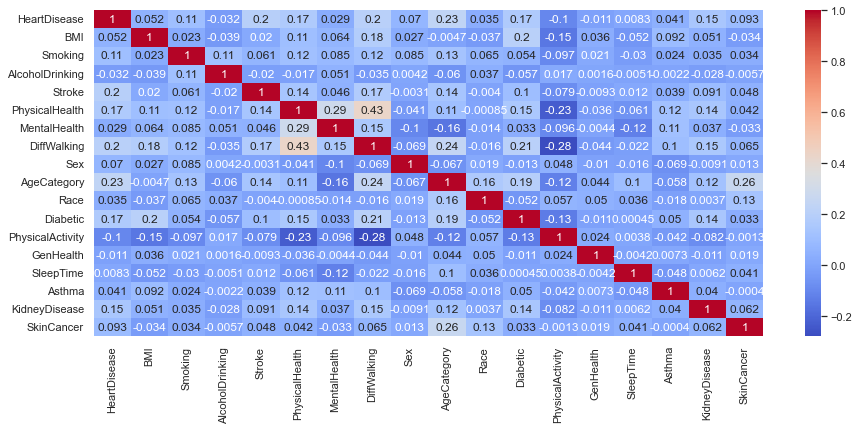

In [22]:
sns.set(rc = {'figure.figsize':(15,6)})
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Dataset Balancing

In [23]:
disease = df.groupby('HeartDisease').size()
disease

HeartDisease
0.0    292422
1.0     27373
dtype: int64

In [24]:
# dataset is highly imbalanced.

In [25]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X,y)
y_resampled.value_counts()

0.0    292422
1.0    292422
Name: HeartDisease, dtype: int64

In [26]:
# Now dataset is balanced

# Logistic Regression Model :

In [27]:
df1= df.copy()
df1.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,5.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0


In [28]:
y=df1.pop('HeartDisease')
X= df1
print (X.shape)
print (y.shape)

(319795, 17)
(319795,)


# Machine Learning

# Logistic Regression

In [29]:
# Split dataset

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [31]:
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [32]:
print ('intercept: ', model.intercept_)
print ('Coef :', model.coef_)

intercept:  [-5.99011819]
Coef : [[ 0.01533682  0.43916536 -0.30220561  1.15580816  0.02139412  0.01086295
   0.39795075  0.74165164  0.28481752  0.02531142  0.28547391 -0.08258708
  -0.03225429 -0.03340202  0.35140977  0.6954752   0.12983293]]


In [33]:
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)

In [34]:
print("accuracy_score: ",metrics.accuracy_score(y_test,y_pred))
print("f1_score: ",metrics.f1_score(y_test,y_pred))
print("recall_score: ",metrics.recall_score(y_test,y_pred))
print("precision_score: ",metrics.precision_score(y_test,y_pred))
print("confusion_matrix :\n ", metrics.confusion_matrix(y_test,y_pred))

accuracy_score:  0.9149668018219911
f1_score:  0.15267968425425843
recall_score:  0.08953587525886222
precision_score:  0.5179704016913319
confusion_matrix :
  [[87046   684]
 [ 7474   735]]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=42)

# Decision Tree Classifier

In [36]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     87576
         1.0       0.91      1.00      0.95     87878

    accuracy                           0.95    175454
   macro avg       0.95      0.95      0.95    175454
weighted avg       0.95      0.95      0.95    175454



# Random Forest Classifier

In [37]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)
print (classification_report(y_test,rfc_prediction))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     87576
         1.0       0.93      1.00      0.97     87878

    accuracy                           0.96    175454
   macro avg       0.97      0.96      0.96    175454
weighted avg       0.97      0.96      0.96    175454



# Decision Tree Classifier: 95%
# Random Forest Classifier: 96%

# K-Nearest Neighbours

In [38]:
X = df.iloc[:, :-2]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.35)

In [39]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [40]:
# Looking for optimal number of nearest neighbours.
import math
math.sqrt(len(y_test))

334.5579172579839

In [41]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [42]:
y_pred = classifier.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
y_pred.shape

(111929,)

In [44]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[100836    834]
 [  9946    313]]


In [45]:
print(accuracy_score(y_test,y_pred))

0.9036889456709164


# KNN Result : 90%

# Naive Bayes Model

In [46]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.35,random_state=0)

In [47]:
model = BernoulliNB()

In [48]:
model.fit(X_train,y_train)

BernoulliNB()

In [49]:
y_pred=model.predict(X_test)

In [50]:
print("accuracy_score: ",metrics.accuracy_score(y_test,y_pred))
print("f1_score: ",metrics.f1_score(y_test,y_pred))
print("recall_score: ",metrics.recall_score(y_test,y_pred))
print("precision_score: ",metrics.precision_score(y_test,y_pred))
print("confusion_matrix :\n ", metrics.confusion_matrix(y_test,y_pred))

accuracy_score:  0.9056079127519039
f1_score:  0.012680521310320535
recall_score:  0.006530527625168446
precision_score:  0.21761658031088082
confusion_matrix :
  [[188120    453]
 [ 19168    126]]


# Naive Bayes  Result : 90%

# SVM Model

In [ ]:
# Creating SVM model.
# from sklearn import svm
# clf = svm.SVC(kernel='linear')
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)

# cm = confusion_matrix(y_test,y_pred)
# print(cm)

# print(accuracy_score(y_test,y_pred))

## { AS IT IS TAKING LONG TO FIT I JUST COMMENT OUT  as it has 319795 rows}